<a href="https://colab.research.google.com/github/teerasitk/signalProcessingInFinance/blob/main/AssignmentSol05TimeSeriesForecasting_SP_Finance_20222.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time-Series statistics for Financial Time-Series Analysis
The goal of this assignment is to enable students to under the importance of statistics in the financial time analysis and forecast. 

## Prepare libraries

In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np 
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import norm, t
import requests 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.1 MB/s 
     |████████████████████████████████| 110 kB 10.6 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 112 kB 54.7 MB/s 
     |████████████████████████████████| 128 kB 61.3 MB/s 
     |████████████████████████████████| 4.1 MB 56.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


## Get all set50 symbols

In [ ]:
url = 'https://classic.set.or.th/mkt/sectorquotation.do?sector=SET50&language=en&country=US'
html = requests.get(url).content
df_list = pd.read_html(html)
df = df_list[-1]
set50_lis = df['Symbol']
set50 = np.array(set50_lis)
print(set50)

['ADVANC' 'AOT' 'AWC' 'BANPU' 'BBL' 'BDMS' 'BEM' 'BGRIM' 'BH' 'BTS' 'CBG'
 'CENTEL' 'COM7' 'CPALL' 'CPF' 'CPN' 'CRC' 'DELTA' 'DTAC' 'EA' 'EGCO'
 'GLOBAL' 'GPSC' 'GULF' 'HMPRO' 'INTUCH' 'IVL' 'JMART' 'JMT' 'KBANK' 'KTB'
 'KTC' 'LH' 'MINT' 'MTC' 'OR' 'OSP' 'PTT' 'PTTEP' 'PTTGC' 'RATCH' 'SCB'
 'SCC' 'SCGP' 'TIDLOR' 'TISCO' 'TOP' 'TRUE' 'TTB' 'TU']


## Get Daily simple returns of all stocks in SET50 in 01/01/2022-31/12/2022. Here, we will use adjusted closed prices

In [ ]:
simple_ret = dict() # create empty dictionary
    # sym = "ADVANC" # stock symbol
for sym in set50:
  df = yf.download(sym + ".BK", start="2022-01-01", end="2022-12-20") # download 2022 data
  close_price = df['Adj Close']
  ret = close_price.pct_change(1)
  ret = ret.dropna()
  simple_ret[sym] = ret
simple_ret = pd.DataFrame(data=simple_ret, index=ret.index)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

## Get daily log-return of all stocks in SET50 in 01/01/2022-31/12/2022. Here, we will use adjusted closed prices

In [ ]:
log_ret = dict() # create empty dictionary
    # sym = "ADVANC" # stock symbol
for sym in set50:
  df = yf.download(sym + ".BK", start="2022-01-01", end="2022-12-20") # download 2022 data
  close_price = df['Adj Close']
  ret = close_price.pct_change(1)
  ret = ret.dropna()
  log_ret[sym] = np.log(1 + ret)
log_ret = pd.DataFrame(data=log_ret, index=ret.index)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

# Risk Management 

Here, we will use the confidence interval of price derived on** Page 54 of Lecture on Statistics of financial time series** to compute 1% maximum drawdown (MDD). Let $\mathcal{P}_0$ be the value of the portfolio at a time $t=0$. Let $p_{\alpha}(t)$ be defined as a value such that

$Pr\left[\mathcal{P}_t \leq p_{\alpha}(t) \right] = \alpha$

The $100\alpha$ % maximum drawdown is defined as 

$\frac{p_{\alpha}(t) - \mathcal{P}_0 }{\mathcal{P}_0$}$


## 1. Using the log-return, compute $\mu_r$ and $\sigma_r$ for all stocks in SET50, and save as "statisticsLogReturn.xlsx"

In [ ]:
mu_r = dict()
sigma_r = dict()
for sym in set50:
  mu = log_ret[sym].mean()
  sig = log_ret[sym].std(ddof=1)
  mu_r[sym] = mu 
  sigma_r[sym] = sig


The $100\alpha$ %  MDD is defind as the ratio of the lower bound $100\alpha$ % confidence interval and $P_0$ minus 1, i.e.,

$MDD = \frac{P_0 \exp\left(\mu_r T - z\left(1-\alpha\right)\sigma_r\right)}{P_0} - 1 = \exp\left(\mu_r T - z\left(1-\alpha\right)\sigma_r\right) -1$

## 2. Compute the 1% MDD of all SET50 stocks, and report the highest (most negative) and lowest MDD (less negative) for 100 days holding of all SET50 stocks 

In [ ]:
T = 100
MDDs = dict()
z = norm.ppf(1-0.01)
for sym in set50:
  mdd = np.exp(mu_r[sym] * T - z * sigma_r[sym] * np.sqrt(T)) - 1 
  MDDs[sym] = mdd   
print(MDDs)
sorted_mdds = {sym: rho for sym, rho in sorted(MDDs.items(), key = lambda item: item[1])}
print(sorted_mdds)

{'ADVANC': -0.29704192660196793, 'AOT': -0.12939847761040058, 'AWC': -0.21816256089092334, 'BANPU': -0.2645463675815891, 'BBL': -0.174888826658539, 'BDMS': -0.2089919382507196, 'BEM': -0.19792171637995026, 'BGRIM': -0.3578369726560865, 'BH': -0.19142116985415225, 'BTS': -0.2723499651993986, 'CBG': -0.3623359785660073, 'CENTEL': -0.2389488722037142, 'COM7': -0.4449800419996012, 'CPALL': -0.2166736224612602, 'CPF': -0.26798025794113167, 'CPN': -0.21985010780354997, 'CRC': -0.19059393539072456, 'DELTA': -0.49054970084421845, 'DTAC': -0.35191101542077696, 'EA': -0.32711285649134747, 'EGCO': -0.2166064715410162, 'GLOBAL': -0.2754309973085497, 'GPSC': -0.3614036505381043, 'GULF': -0.2572513699961899, 'HMPRO': -0.24064837233522707, 'INTUCH': -0.21834981858816882, 'IVL': -0.35111744139608336, 'JMART': -0.5063445202328529, 'JMT': -0.42272278116174256, 'KBANK': -0.24854995632941657, 'KTB': -0.1646742618665996, 'KTC': -0.2367767939091331, 'LH': -0.1864375811431227, 'MINT': -0.314667231136321, 'MT

Hight MDD _**JMART**___ % with _**50.6%**___ 
Lowest MDD _**TISCO**____ % with _**10.74%**____

# 3. Construct a portfolio containing equal amoung of BGRIM and PTTEP. For simplicity, let us put 500k on each BGRIM and PTTEP on 04/01/222 (First trading day in 2022). Plot the gain of the port in 2022.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


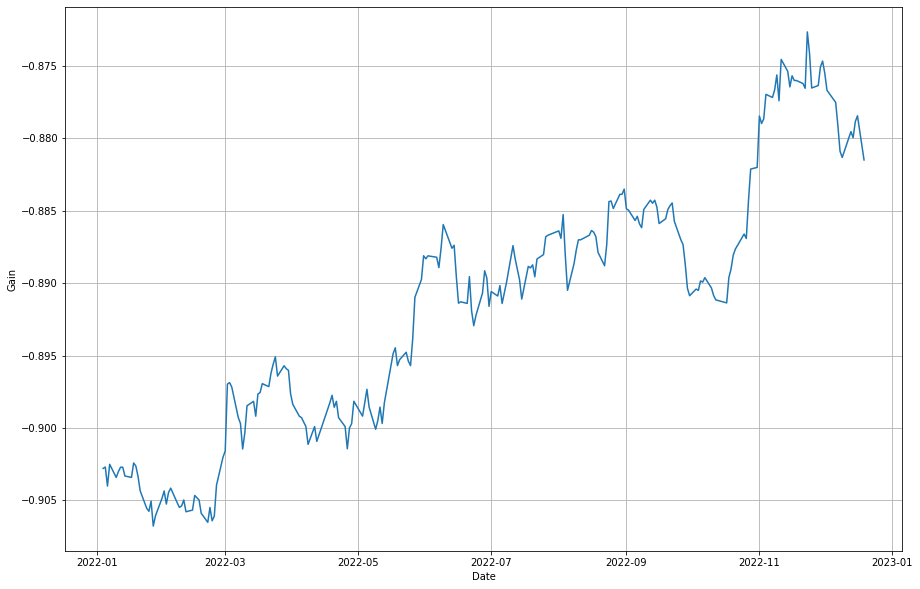

In [ ]:
bgrim =  yf.download("BGRIM.BK", start="2022-01-01", end="2022-12-20") # load data from yahoo
pttep =  yf.download("PTTEP.BK", start="2022-01-01", end="2022-12-20") # load data from yahoo
s_bgrim = 500_000/ bgrim.iloc[0]['Open'] # Buy BGRIM at the opening price on the first trading day
s_pttep = 500_000/ pttep.iloc[0]['Open'] # Buy BGRIM at the opening price on the first trading day
my_port = s_bgrim * bgrim['Adj Close'] + s_pttep * pttep['Adj Close'] 
plt.figure(figsize=(15,10))
plt.plot(my_port/1_000_0000 - 1.0)
plt.xlabel('Date')
plt.ylabel("Gain")
plt.grid()

## 4. Compute the 1% MDD of the above portfolio.

In [ ]:
log_ret_port = np.log(1+my_port.pct_change(1)).dropna()
mu_port = log_ret_port.mean()
std_portr = log_ret_port.std(ddof=1)
mdd = np.exp(mu_port * T - z * std_portr * np.sqrt(T)) - 1
print(f"My port 1% MDD: {mdd:0.3f}")

My port 1% MDD: -0.162


My Port MDD: _**16.2**______ , PTTEP MDD:_**28.68**_____, BGRIM MDD: _**35.8%**_____.

## 5. Why do my port MDD is significant smaller (less negative) both PTTEP and BGRIM? 

Answer__**The volatility of a portfolio containing multiple stocks that arer not highly correlated is lower than indvidual stocks**____________.

## 6. Compute lag 1 auto-correlation value $\rho(1)$, and sort from the largest to smallest 

In [ ]:
rho1 = dict()
for sym in set50:
  rho1[sym] = log_ret[sym].autocorr(lag=1)
rho1_sorted = {sym: rho for sym, rho in sorted(rho1.items(), key = lambda item: item[1], reverse=True)}
print(rho1_sorted)

{'TOP': 0.20421272447087194, 'PTTGC': 0.16305775651044388, 'SCGP': 0.12850798068707447, 'GPSC': 0.10396142027513, 'KTC': 0.0883397460642183, 'CBG': 0.08472937441758276, 'IVL': 0.08210260644233994, 'MTC': 0.07428149945694223, 'EA': 0.06940781350852254, 'KBANK': 0.06916270006267845, 'GLOBAL': 0.06560646886271346, 'MINT': 0.05906698216765239, 'SCC': 0.05708878019644391, 'BGRIM': 0.05480247536374645, 'CPN': 0.03772108749639876, 'TTB': 0.03170370908506556, 'BANPU': 0.022027441756688266, 'TU': 0.021342856190818837, 'DELTA': 0.01352083497325038, 'PTTEP': 0.009655056394238424, 'JMT': 0.0003162219617524387, 'PTT': -0.00603783122964074, 'LH': -0.014790285007015737, 'CPF': -0.01793321253292274, 'SCB': -0.020531336340439386, 'TIDLOR': -0.02877854160278522, 'BBL': -0.03402844105943915, 'ADVANC': -0.03642370513998352, 'CPALL': -0.037924622881008056, 'BTS': -0.03930534178059624, 'HMPRO': -0.04449507473185824, 'JMART': -0.045474251235595065, 'INTUCH': -0.04947037493175869, 'OSP': -0.05011734303206711,

Highest $\rho(1)$: _**TOP**____ and lowest $\rho(1)$:_**AMC**________ 

## 7. Using the stock with highest $\rho(1)$ to construct the minimum mean square error forcast using three hitorical vales to forecast future. An example is on 58 of the Lecture 05.
Please note that

$X_t = r_t - \mu_r$ 

In [ ]:
mur = log_ret['TOP'].mean()
x = log_ret['TOP'] - mur 
g0 = x.var(ddof=1)
g1 = x.autocorr(lag=1) * g0
g2 = x.autocorr(lag=2) * g0
g3 = x.autocorr(lag=3) * g0
A = np.array([[g0, g1, g0],
              [g1, g0, g1],
              [g2, g1, g0]])
b = np.array([g1, g2, g3])
alpha = np.linalg.solve(A,b)
print(alpha)

[ 0.29905908 -0.24787547 -0.04422703]


The prediction is 

$\hat{X}_{t+1}$ = **0.299** $X_{t}$ +  **-0.248** $X_{t-1}$ + **-0.044** $X_{t-2}$


## 8. Using this forecast for trading strategy where you will take the all-in position (use all money to buy the stocks) if the forecast predicts $\hat{r}_{t+1} = \hat{X}_{t+1} + \mu_r > 0$, and no position (sell all stocks to keep cash)if the forecast predicts $\hat{r}_{t+1} = \hat{X}_{t+1} + \mu_r \leq 0$.

Let us assume that the initial wealth on 2021-01-04 is at 1,000,000 THB. Assume that there is no transaction cost and stocks are inifinitely divisible. 
 - What is the final size of the portfolio at the end of 2022? 
 - Gain or loss in percentages of this trading strategy. 
 - Compare to buy-and-hold strategy where, on the first trading date, you take the all-in position and sell the stock at the end of 20222.

[*********************100%***********************]  1 of 1 completed
With our trading strategy, Final Wealth: 1,687,996.35, Gain (or Loss): 68.80%.
With the buy-and-hold strategy, Final Wealth: 1,112,399.02, Gain (or Loss): 11.24%.


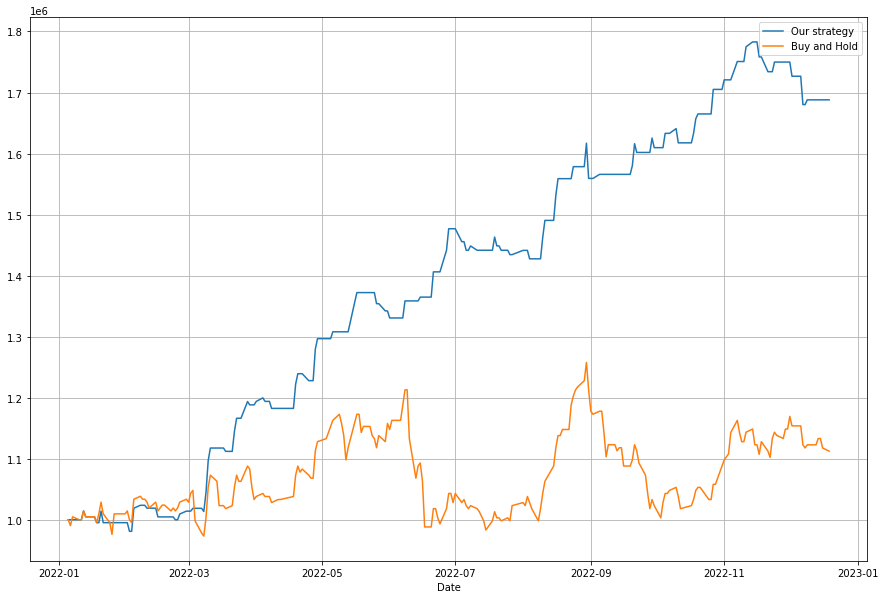

In [ ]:
log_top = log_ret['TOP']
top =  yf.download("TOP.BK", start="2022-01-01", end="2022-12-20")['Adj Close'] # load data from yahoo 
init_wealth = 1_000_000
wealth = []
stock = []
cash = []
buy_and_hold = []

for cnt, date in enumerate(log_top.index):
  if cnt == 0:
    sb = init_wealth / top[date]

  buy_and_hold.append(sb * top[date])
  if cnt < 3: # We need at least three historical dates
    wealth.append(init_wealth)
    stock.append(0)
    cash.append(init_wealth)
  else:
    xt = log_top.iloc[cnt] - mur
    xt_1 = log_top.iloc[cnt-1] - mur
    xt_2 = log_top.iloc[cnt-2] - mur
    xtp1 = alpha[0] * xt + alpha[1] * xt_1 + alpha[2] *  xt_2
    if (xtp1 > 0) and (cash[-1] > 0 ): # buy
      s = cash[-1] / top[date]
      c = 0        
    elif (xtp1 <= 0) and (stock[-1] > 0) : # sell
      c = stock[-1] * top[date]
      s = 0
    else:
      c = cash[-1] 
      s = stock[-1] 
    cash.append(c)
    stock.append(s) 
    w = c + s * top[date] 
    wealth.append(w)
  
wealth = pd.Series(data=wealth, index=log_top.index)
buy_and_hold = pd.Series(data=buy_and_hold, index=log_top.index)
plt.figure(figsize=(15,10))
plt.plot(wealth, label="Our strategy")
plt.plot(buy_and_hold, label="Buy and Hold")
plt.xlabel('Date')
plt.legend()
plt.grid()

gain = wealth.iloc[-1] / init_wealth - 1 
gain_bd = buy_and_hold.iloc[-1] / init_wealth - 1 
print(f"With our trading strategy, Final Wealth: {wealth.iloc[-1]:,.2f}, Gain (or Loss): {gain*100:0.2f}%.")
print(f"With the buy-and-hold strategy, Final Wealth: {buy_and_hold.iloc[-1]:,.2f}, Gain (or Loss): {gain_bd*100:0.2f}%.")

